In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from matplotlib.colors import LightSource
from scipy.integrate import quad

from lib_geos import *   # plot_histo
%matplotlib inline

In [2]:
# limits for x to consider
# OUTSIDE THESE LIMITS WE ASSUME THAT p(x) = 0
xmin = -15
xmax = 12
# note that parameters like A1, A2, x1, x2 must be assigned before p()
x1 = -2
A1 = 2
sig1 = 2
x2 =  4
A2 = 1
sig2 = 0.5;

# KEY COMMANDS
ifun = 1      # 1 or 2
iannot = 0    # =1 for annotations in one subplot

# define in-line function p(x)
if ifun==1:
    def p(x):
        return A1*np.exp(-(x-x1)**2/(2*sig1**2))
if ifun==2:
    def p(x):
        return A1*np.exp(-(x-x1)**2/(2*sig1**2))+A2*np.exp(-(x-x2)**2/(2*sig2**2))
    
ncurve = 1000
xcurve = np.linspace(xmin,xmax,ncurve)
pcurve = p(xcurve)

# generate samples
# KEY: what does np.random.random() do?
NTRY = 1e5
xtry = xmin + (xmax-xmin)*np.random.random((int(NTRY),1))
# sample the function
A = np.max([A1,A2]);                       # note: only true for our choice of p(x)
#A = np.max(pcurve);                       # (will work for any densely discretized p(x))
ptry = p(xtry) / A;                        # SET A: values between 0 and 1
chance = np.random.random((int(NTRY),1))   # SET B: values between 0 and 1

# KEY COMMAND: compare pairs of test samples in sets A and B,
#              then accept or reject the test sample
ikeep = ptry > chance
xkeep = xtry[ikeep]

In [3]:
# LAB EXERCISE





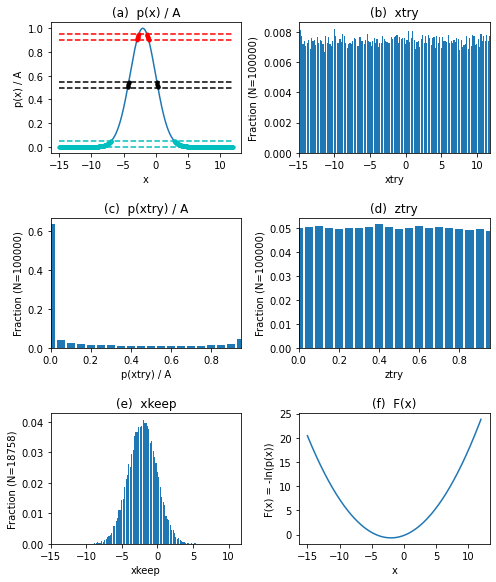

In [4]:
# parameters for histograms
dxbin = 0.2
dpbin = 0.05    # 0.05, 0.1, 0.2
edgesx = np.arange(xmin,xmax,dxbin)
nex = len(edgesx)
edgesp = np.arange(0,1,dpbin)
nep = len(edgesp)

fig=plt.figure(figsize = (7,8))
nr=3
nc=2

plt.subplot(nr,nc,1)
plt.plot(xcurve,pcurve/A)
if iannot == 1:
    for jj in range(3):
        if jj == 0:
            ileftbin = nep - 2
            pc = 'r.'
            pl = 'r--'
        elif jj == 1:
            ileftbin = int(np.round(nep*0.50))
            pc = 'k.'
            pl = 'k--'
        elif jj == 2:
            ileftbin = 0
            pc = 'c.'
            pl = 'c--'

        Pcut1 = edgesp[ileftbin]
        Pcut2 = edgesp[ileftbin+1]
        isub = (pcurve/A >= Pcut1)*(pcurve/A < Pcut2)

        plt.plot(xcurve[isub],pcurve[isub]/A,pc)
        plt.plot(np.array([xmin,xmax]),Pcut1*np.array([1,1]),pl)
        plt.plot(np.array([xmin,xmax]),Pcut2*np.array([1,1]),pl)

plt.xlabel('x')
plt.ylabel('p(x) / A')
plt.title('(a)  p(x) / A')

plt.subplot(nr,nc,2)
plot_histo(xtry,edgesx)
plt.xlabel('xtry')
plt.title('(b)  xtry')

plt.subplot(nr,nc,3)
plot_histo(ptry,edgesp)
plt.xlabel('p(xtry) / A')
plt.title('(c)  p(xtry) / A') 

plt.subplot(nr,nc,4)
plot_histo(chance,edgesp)
plt.xlabel('ztry')
plt.title('(d)  ztry')

plt.subplot(nr,nc,5)
plot_histo(xkeep,edgesx)
plt.xlabel('xkeep')
plt.title('(e)  xkeep')

# if p is a probability density and F is the misfit function, then
#    p(x) = exp(-F(x))
#    F(x) = -ln(p(x))
plt.subplot(nr,nc,6)
plt.plot(xcurve,-np.log(pcurve))
plt.xlabel('x')
plt.ylabel('F(x) = -ln(p(x))')
plt.title('(f)  F(x)')

plt.subplots_adjust(wspace=0.3,hspace=0.5)

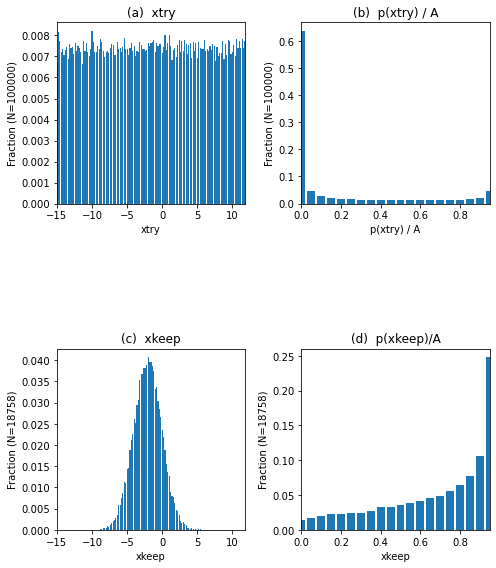

In [5]:
# 2 x 2 summary plot

fig=plt.figure(figsize=(7,8))
#fig.tight_layout() 
nr=2
nc=2

plt.subplot(nr,nc,1)
plot_histo(xtry,edgesx)
plt.xlabel('xtry')
plt.title('(a)  xtry')

plt.subplot(nr,nc,2)
plot_histo(ptry,edgesp)
plt.xlabel('p(xtry) / A')
plt.title('(b)  p(xtry) / A') 

plt.subplot(nr,nc,3)
plot_histo(xkeep,edgesx)
plt.xlabel('xkeep')
plt.title('(c)  xkeep')

plt.subplot(nr,nc,4)
plot_histo(ptry[ikeep],edgesp)
plt.xlabel('xkeep')
plt.title('(d)  p(xkeep)/A')

plt.subplots_adjust(wspace=0.3,hspace=0.8)

In [6]:
# DEFINE THE TEST FUNCTION HERE






In [7]:
# define a grid for evaluating and plotting your function
nx = 100
ny = nx+1      # avoid square arrays (for debugging)
n = nx*ny
xmin = -3
xmax = 3
ymin = -2
ymax = 2
xvec = np.linspace(xmin,xmax,num=nx)
yvec = np.linspace(ymin,ymax,num=ny)
[X,Y] = np.meshgrid(xvec,yvec)

In [8]:
# OPTION A -- pass vector to p(), then plot as matrix
x = X.flatten(order='C')
y = Y.flatten(order='C')
pplot = p(x,y)
Pplot = np.reshape(pplot,(ny,nx))
plt.figure()
plt.pcolor(X,Y,Pplot,cmap='jet')
plt.axis('equal')
plt.show()

TypeError: p() takes 1 positional argument but 2 were given

In [ ]:
# OPTION B -- pass matrix to p(), then plot as matrix
Fplot = p(X,Y)
plt.figure() 
plt.pcolor(X,Y,Fplot,cmap='jet')
plt.axis('equal')
plt.show()

In [ ]:
# OPTION C -- plot as vector
plt.figure()
plt.scatter(x,y,s=4**2,c=pplot,cmap='jet')
plt.axis('equal')
plt.show()

In [ ]:
# OPTION D -- plot matrix on 3D surface
light = LightSource(50, -45)
rgb = np.ones((Fplot.shape[0], Fplot.shape[1], 3))
illuminated_surface = light.shade_rgb(rgb, Fplot)
ax = Axes3D(plt.figure(figsize=(7,8)))
surf = ax.plot_surface(X, Y, Fplot, cmap=cm.jet,linewidth=0, antialiased=False)